Description
Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.
Do the users spend more time on the new landing page than the old landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

Data Dictionary:

user_id - This represents the user ID of the person visiting the website.
group - This represents whether the user belongs to the first group (control) or the second group (treatment).
landing_page - This represents whether the landing page is new or old.
time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
converted - This represents whether the user gets converted to a subscriber of the news portal or not.
language_preferred - This represents the language chosen by the user to view the landing page.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [4]:
df= pd.read_csv('abtest.csv')

In [5]:
df.shape

(100, 6)

In [6]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations:
In the dataset, there are 100 observations or entries and 6 variables and has no missing value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
The dataset has 3 data types, user id is of the data type int64. Group, landing page, converted and language preferred are also of the object type but time spent on the page is of float64.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Observations:
On average, users spend 5.4 minutes on the page with a standard deviation of 2.4. The median time it take users on the page is also around 5.4 minutes similar to the mean suggesting the time spent on the page follows a normal distribution.

In [9]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


# Explore the dataset and extract insights using Exploratory Data Analysis.


Text(0.5, 1.0, 'Landing Page')

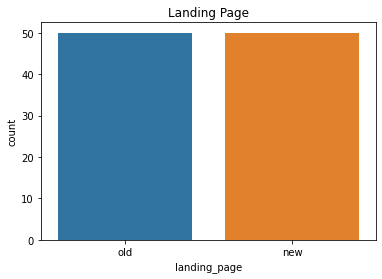

In [10]:
sns.countplot(df['landing_page'])
plt.title('Landing Page')

### Obervations: 
There are 50 old and 50 new users on the landing page

Text(0.5, 1.0, 'group')

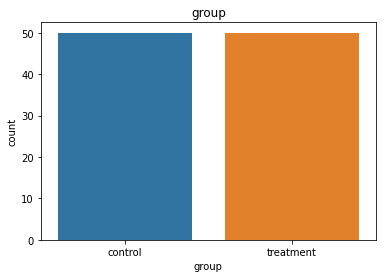

In [11]:
sns.countplot(df['group'])
plt.title('group')

### Obervations: 
There are 50 treatment and 50 control users in the groups

Text(0.5, 1.0, 'converted')

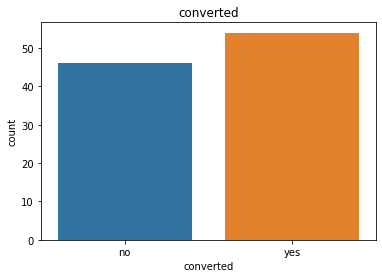

In [12]:
sns.countplot(df['converted'])
plt.title('converted')

### Obervations: 
The number of users who are converted when they use the landing page is higher than those who do not get converted.

Text(0.5, 1.0, 'language_preferred')

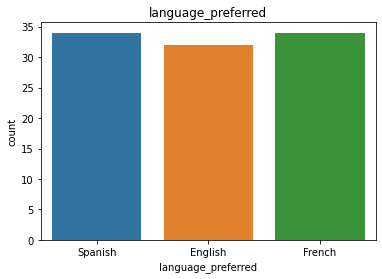

In [13]:
sns.countplot(df['language_preferred'])
plt.title('language_preferred')

In [14]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

### Obervations: 
The number of users who prefer Spanish and French are the same but smaller for English.

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

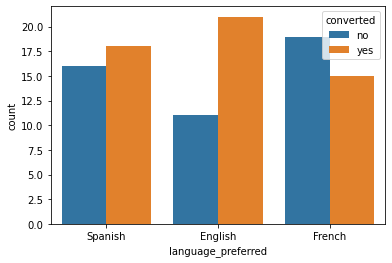

In [15]:
sns.countplot(x = 'language_preferred', data = df, hue = 'converted')

### Obervations: 
The number of users that were converted on the landing page is higher for users who prefer English, followed by Spanish and then French. That is more people who prefer English were converted than the two other languages.

<AxesSubplot:xlabel='landing_page', ylabel='count'>

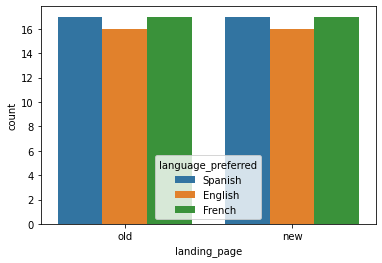

In [16]:
sns.countplot(x = 'landing_page', data = df, hue = 'language_preferred')

### Observations:
With respect to language preferred, there does not seem much of a difference in the landing page they are on, whether new or old

<AxesSubplot:xlabel='landing_page', ylabel='count'>

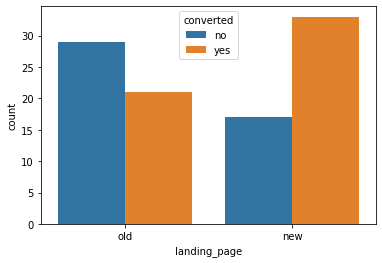

In [17]:
sns.countplot(x = 'landing_page', data = df, hue = 'converted')

### Observations:
With respect to landing page, there were more users who were converted on the new than they were on the old.

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

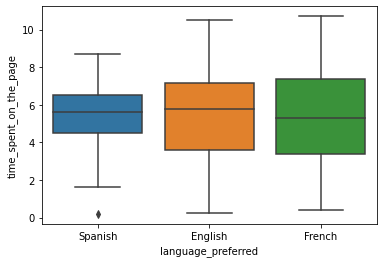

In [18]:
sns.boxplot(y='time_spent_on_the_page', x = 'language_preferred', data = df)

### Observations:
With respect to language preferred, the distribution of time spent on the page seems to follow a normal distribution for English and french, while it appear to be left skewed for Spanish. The median time spent on the page is higher for users who prefer English followed by Spanish and then French. There is an outlier on the Spanish distribution.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='converted'>

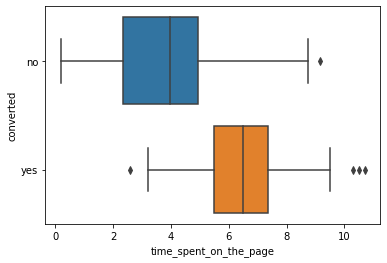

In [19]:
sns.boxplot(x='time_spent_on_the_page', y = 'converted', data = df)

### Observations:
With respect to converted, the distribution of time spent on the page seems to right skewed for both. The median time spent on the page is higher for users who were converted than users who were not converted. There are outliers on both distributions.

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='group'>

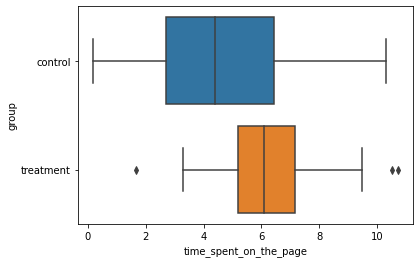

In [20]:
sns.boxplot(x='time_spent_on_the_page', y = 'group', data = df)

### Observations:
On average, the time spent on the page is higher in the treatment group  with a few outliers


<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='landing_page'>

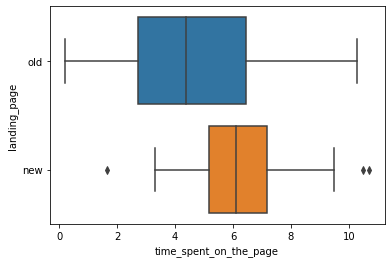

In [21]:
sns.boxplot(x='time_spent_on_the_page', y = 'landing_page', data = df)

### Observations:
On average, the time spent on the page is higher when users were on the new page compared to the old with a few outliers

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='landing_page'>

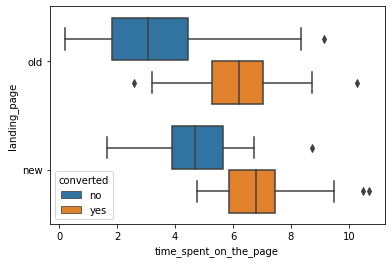

In [22]:
sns.boxplot(x='time_spent_on_the_page', y = 'landing_page', data = df, hue='converted')

### Observations:
On average, the time spent on the page is higher on the new landing page for users who were converted, compared to the mean time spent for those who were converted on the old landing page

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

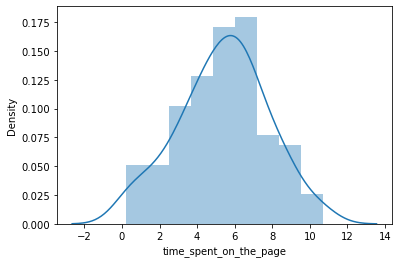

In [23]:
sns.distplot(df['time_spent_on_the_page'], kde = True, bins=9)

### observation
The distribution of time spent on the page follows a normal distribution, with mean, median and mode approximately equal. The best measure of center and spread are the mean and standard deviation.

# Do the users spend more time on the new landing page than the old landing page?


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2$ be the means of the new and old landing page respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1 > \mu_2$

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, the populations normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

In [24]:
new = df[df['landing_page']=='new']['time_spent_on_the_page']
new.head(2)

1    7.13
2    4.40
Name: time_spent_on_the_page, dtype: float64

In [25]:
print(new.mean())
print(new.std())


6.2232
1.8170310387878263


In [26]:
old= df[df['landing_page']=='old']['time_spent_on_the_page']
old.head(2)

0    3.48
3    3.02
Name: time_spent_on_the_page, dtype: float64

In [27]:
print(old.mean())
print(old.std())

4.532400000000001
2.581974849306046


In [28]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [29]:
t,p_value = stats.ttest_ind(new, old, equal_var = True, alternative='greater')
print("test = ",t, ", p_value = ", p_value)

test =  3.7867702694199856 , p_value =  0.0001316123528095005


### Insight
As the p-value (0.0001316) is less than the level of significance, we can reject the null hypothesis. Hence, at a 5% significance level we do have enough evidence to support the claim that users spend more time on the new landing page than the old landing page.

# Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?


Let $p_1,p_2$ be the proportions of users who visit the new landing page and get converted and users who visit the old landing page and get converted respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

In [30]:
# set the counts of new
new2 = df[df['landing_page']=='new']
newcon= new2[new2['converted']=='yes']
ncon=len(newcon)
print(ncon)

33


In [31]:
# set the counts of old
old2 = df[df['landing_page']=='old']
oldcon= old2[old2['converted']=='yes']
ocon=len(oldcon)
print(ocon)

21


In [32]:
# set the sample sizes
new3 = len(new2)


old3 = len(old2)
print(new3)
print(old3)

50
50


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

In [33]:
test_stat, p_value = proportions_ztest([ncon, ocon],[new3,old3], alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Insight

As the p-value is less than the significance level 0.05, we reject the null hypothesis. Thus, at a 5% significance level, there is enough statistical significance to conclude that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

# Does the converted status depend on the preferred language? 


### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted Status is independent of Preferred language.

against the alternate hypothesis

>$H_a:$ Converted Status is dependent on Preferred language.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


In [34]:
df1 = df[['converted', 'language_preferred']]
df1.head()

,converted,language_preferred
0,no,Spanish
1,yes,English
2,no,Spanish
3,no,French
4,yes,Spanish


In [35]:
crosstab = pd.crosstab(df1['converted'], df1['language_preferred'])
crosstab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [36]:
chi, p_value, dof, expected = chi2_contingency(crosstab)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Insight
As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, at a 5% significance level, there is enough statistical significance to conclude that converted status is independent of language preferred.

# Is the mean time spent on the new page same for the different language users?

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for Spanish, English and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent on the page is different from the the rest of the preferred languages.

In [37]:
new2 = df[df['landing_page']=='new']
new2['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [38]:
new2.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [39]:
# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred'] == 'Spanish'], 
                                   df['time_spent_on_the_page'][df['language_preferred'] == 'English'], 
                                   df['time_spent_on_the_page'][df['language_preferred'] == 'French'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [41]:
test_stat, p_value = f_oneway(new2.loc[new2['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              new2.loc[new2['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new2.loc[new2['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is larger than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one mean time spent on the new page is different from the rest at 5% significance level.

### Key Insights

* From the overall data, the users were random split into two groups, 50 in the treatment and 50 in the control group. The control group were offered the old landing page and the new landing page were offered to the treatment group. It can be seen that more people who visited the landing pages were converted to subscribers whilst there were not much of a difference in the the language preferred amongst (Spanish, English and French). 

* The number of users that were converted to subscribers on the landing page is slightly higher for users who prefer English, followed by Spanish and then French. That is more people who prefer English were converted than the two other languages. With respect to landing page, there were more users who were converted on the new landing page than they were on the old. 

* With respect to converted, the distribution of time spent on the page seems to right skewed for both. The median time spent on the page is higher for users who were converted than users who were not converted. There are outliers on both distributions. On average, the time spent on the page is higher on the new landing page for users who were converted, compared to the mean time spent for those who were converted on the old landing page.

* After testing the hypotheses', we found that  the users spend more time on the new landing page than the old landing page, also the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page. The hypothsis test again suggests that the mean time spent on the new page is the same for the different language users. It was also found according to the hypothesis testing that converted status is independent of language preferred. All testings were done at a 5% significance level.

### Recommendations:

* Since the conversion rate was higher on the new landing page, this suggests that the new landing page is working as intended, thus it is more effective in gathering new subscribers, even though there were equal number of people on both pages. Hence the company should encourage more people on the new landing page. 

* Again, it was seen that more users spent more time on the new landing page than on the old, hence the new landing page is working as intended since it brings more interactions on average, and therefore the company should consider switching from the old landing page to the new one.

* Also, there doesnt seem to be any dependency between converted status and the langauge preference, and hence the company should not be too worried about which language a user prefers when it coming converting them to subscribers.

* Per the ANOVA test, the mean time spent on the new landing page doesnt not seem to be significantly different from one another interms of language preferred. In other words users of the different preferred language seems to spend the same time on average on the new landing page 

